# importing torch and setting up device agnostic code

In [2]:
import torch
from torch import nn

torch.__version__

'2.7.0+cpu'

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# get data

In [4]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")  #
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} dir already exists")
else:
    print(f"{image_path} does not exist, creating one")
    image_path.mkdir(parents=True, exist_ok=True)
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get(
        "https://github.com/mrdbourke/pytorch-deep-learning/raw/refs/heads/main/data/pizza_steak_sushi.zip")
    print(f"downloading pizza, steak, sushi data")
    f.write(request.content)
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print(f"unzipping pizza, steak, sushi data")
    zip_ref.extractall(image_path)

data\pizza_steak_sushi dir already exists
downloading pizza, steak, sushi data
unzipping pizza, steak, sushi data


In [5]:
import os


def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")


walk_through_dir(image_path)

There are 2 directories and 0 images in data\pizza_steak_sushi
There are 3 directories and 0 images in data\pizza_steak_sushi\test
There are 0 directories and 25 images in data\pizza_steak_sushi\test\pizza
There are 0 directories and 19 images in data\pizza_steak_sushi\test\steak
There are 0 directories and 31 images in data\pizza_steak_sushi\test\sushi
There are 3 directories and 0 images in data\pizza_steak_sushi\train
There are 0 directories and 78 images in data\pizza_steak_sushi\train\pizza
There are 0 directories and 75 images in data\pizza_steak_sushi\train\steak
There are 0 directories and 72 images in data\pizza_steak_sushi\train\sushi


In [6]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

## visualize an image

In [8]:
image_path

WindowsPath('data/pizza_steak_sushi')

random image path: data\pizza_steak_sushi\test\sushi\3196729.jpg
image class: sushi
image height: 384
image width: 512


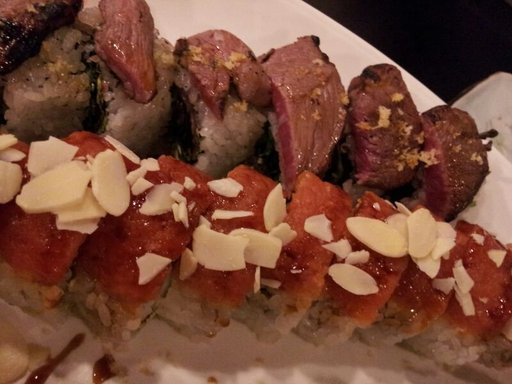

In [80]:
import random
from PIL import Image

# random.seed(42)
image_path_list = list(image_path.glob("*/*/*.jpg"))
random_image_path = random.choice(image_path_list)

image_class = random_image_path.parent.stem

img = Image.open(random_image_path)

print(f"random image path: {random_image_path}")
print(f"image class: {image_class}")
print(f"image height: {img.height}")
print(f"image width: {img.width}")
img

(np.float64(-0.5), np.float64(511.5), np.float64(383.5), np.float64(-0.5))

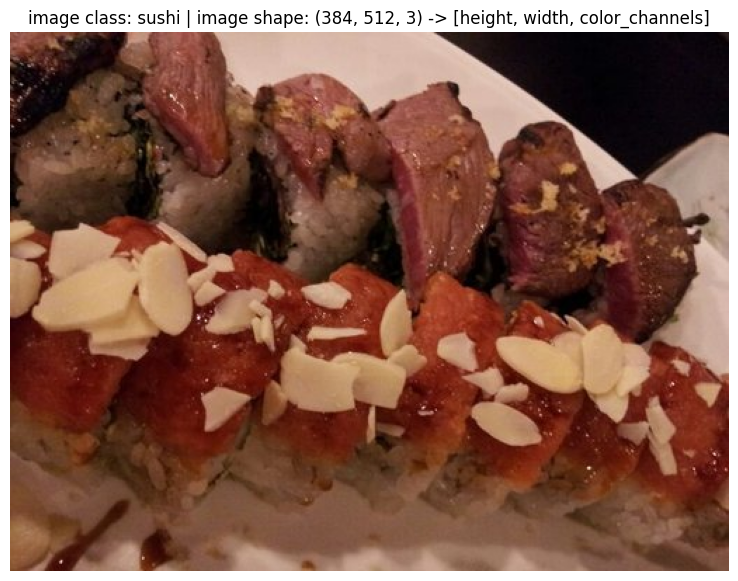

In [81]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.asarray(img)
plt.figure(figsize=(10,7))
plt.imshow(np.array(list(img.convert('RGBA').getdata())).reshape(img.height, img.width, 4))
plt.title(f"image class: {image_class} | image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)